In [27]:
# Download important libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)
import json
import os
from os import path
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
import nltk

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

from nltk.tokenize import sent_tokenize
import warnings
warnings.filterwarnings('ignore')

In [2]:
def clean_df(df):
    df = df[df.caption != '']
    return df.reset_index(drop=True)

In [176]:
st_time = time.time()
rev_dpath = '../data/outputs/reviews/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)]
folds = len(rev_files)//2000
for i in range(folds+1):
    parq_dpath = '../data/spark/reviews/'
    parq_fname = '../data/spark/reviews/review_fold_' + str(i) + '.parq'
#     parq_files = [parq_dpath+ f for f in os.listdir(parq_dpath)]
#     if parq_fname not in parq_files[:-1]:
    df_rev = pd.DataFrame()
    if ((i+1)*2000 )< len(rev_files):
        rev_files_fold = rev_files[i*2000:(i+1)*2000]
    else:
        rev_files_fold = rev_files[i*2000:]
    for file in rev_files_fold:

        df = pd.read_json(file)

        df['place_id'] = file.split('_',1)[1]
        df['place_id'] = df['place_id'].str.replace('.json','')
        df_rev = pd.concat((df_rev, df), ignore_index=True)

    df_rev.to_parquet(parq_fname)
    print('Fold ',str(i), ' Done. Time Taken = ',time.time()-st_time)
    

Fold  0  Done. Time Taken =  440.1555726528168
Fold  1  Done. Time Taken =  847.389475107193
Fold  2  Done. Time Taken =  1281.4428355693817
Fold  3  Done. Time Taken =  1607.2764291763306
Fold  4  Done. Time Taken =  1948.7165365219116
Fold  5  Done. Time Taken =  2144.110013961792


In [3]:
rev_parq_dir = '../data/spark/reviews/'
parq_files = [rev_parq_dir+ f for f in os.listdir(rev_parq_dir) if os.path.isfile(rev_parq_dir+ f)]
df_review = pd.DataFrame()
for file in parq_files:
    df_fold = pd.read_parquet(file)
    df_review = pd.concat((df_review, df_fold), ignore_index=True)
df_review = clean_df(df_review)
df_review = df_review.drop_duplicates(subset = ['id_review'], keep='first')
print(len(df_review))
df_review.sample(2)

1080640


,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,url_user,census_block_group,place_id
416292,ChdDSUhNMG9nS0VJQ0FnSURBOXFMUWhBRRAB,The sushi tacos are amazing.,3 years ago,2021-03-27,5,Anh Nguyen,0,0,https://www.google.com/maps/contrib/1056480596...,170312415003,ChIJSRu99cbSD4gRz_mDVW6zBXQ
808293,ChRDSUhNMG9nS0VJQ0FnSUR5dkxnaRAB,"Beautiful location, the food and service was e...",a month ago,2021-04-01,5,Ior Bay,3,0,https://www.google.com/maps/contrib/1177789878...,360470033002,ChIJETwRRE5bwokRW0BCpX-nZjI


In [4]:
df_rest = pd.read_parquet('../data/spark/restaurants/restaurants.parq')
df_rest = df_rest.drop_duplicates(subset = ['place_id'], keep='first')
df_rest.sample(2)

,business_status,geometry,icon,name,opening_hours,photos,place_id,plus_code,reference,scope,types,vicinity,rating,user_ratings_total,CBG,Radius,price_level,permanently_closed
21251,OPERATIONAL,"{'location': {'lat': 34.0425003, 'lng': -118.3...",https://maps.gstatic.com/mapfiles/place_api/ic...,Chin's Teriyaki BBQ Chicken,{'open_now': True},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJn23PkXq4woARMohGb2rX9tk,"{'compound_code': '2MVR+2H Los Angeles, CA, US...",ChIJn23PkXq4woARMohGb2rX9tk,GOOGLE,"[restaurant, food, point_of_interest, establis...","1708 South Western Avenue, Los Angeles",4.4,84.0,60372213022,272.974488,1.0,NaN
16365,OPERATIONAL,"{'location': {'lat': 40.92666, 'lng': -73.8391...",https://maps.gstatic.com/mapfiles/place_api/ic...,Pizza Pizza,{'open_now': True},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJc2mWflONwokRETUdci9vVB4,"{'compound_code': 'W5G6+M8 Mount Vernon, NY, U...",ChIJc2mWflONwokRETUdci9vVB4,GOOGLE,"[meal_delivery, meal_takeaway, restaurant, foo...","708 Locust Street, Mount Vernon",4.2,242.0,361190038001,237.357582,1.0,NaN


In [57]:
'''
rev_dpath = '../data/outputs/cbg_restaurants/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)][:-1]
df_rest = pd.DataFrame()
for file in rev_files:
    
    df = pd.read_json(file)

    df_rest = pd.concat((df_rest, df), ignore_index=True)
df_rest.to_parquet('../data/spark/reviews/restaurants.parq')
df_rest = df_rest.drop_duplicates(subset = ['place_id'], keep='first')
'''

"\nrev_dpath = '../data/outputs/cbg_restaurants/'\n        \nrev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)][:-1]\ndf_rest = pd.DataFrame()\nfor file in rev_files:\n    \n    df = pd.read_json(file)\n\n    df_rest = pd.concat((df_rest, df), ignore_index=True)\ndf_rest.to_parquet('../data/spark/reviews/restaurants.parq')\ndf_rest = df_rest.drop_duplicates(subset = ['place_id'], keep='first')\n"

In [5]:
df_merge = df_review.join(df_rest.set_index('place_id'), on='place_id', rsuffix= '_restaurant',how='inner')
print(len(df_merge))
df_merge.sample(2)

1080640


,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,url_user,census_block_group,...,reference,scope,types,vicinity,rating_restaurant,user_ratings_total,CBG,Radius,price_level,permanently_closed
1152326,ChdDSUhNMG9nS0VJQ0FnSURRMExMRDNRRRAB,Words cant even describe how good the food tas...,2 years ago,2021-04-05,5,Dboy Productionz,2,0,https://www.google.com/maps/contrib/1042772005...,360610015011,...,ChIJ4QmqDhhawokRjGLGpHTQ_Fc,GOOGLE,"[restaurant, food, point_of_interest, establis...","111 Fulton Street, New York",4.2,426.0,360610015011,172.988292,1.0,NaN
453152,ChZDSUhNMG9nS0VJQ0FnSUMwaHZiOUdnEAE,The food was amazing-- our first time in Chica...,a year ago,2021-03-28,5,Donna Sylvester,0,0,https://www.google.com/maps/contrib/1043414172...,170313201002,...,ChIJ5w4B3q4sDogR6MrdigqRKNM,GOOGLE,"[bakery, cafe, restaurant, food, point_of_inte...","360 N Michigan Ave ENTRANCE ON, East Wacker Dr...",4.2,988.0,170313201002,283.971812,2.0,NaN


In [6]:
def clean_merge(df):
    df = df[df.caption.str.len() > 25]
    mask = df.caption.str.contains('\(Original\)')
    df.caption.loc[mask] = df.caption[mask].str.split('\(Original\)').str[0]
    df.caption = df.caption.str.replace('\(Translated by Google\)','')
#     df.caption = df.caption.replace('(Original)','')
    return df

In [28]:
df_merge_clean = clean_merge(df_merge)
print(len(df_merge_clean))
df_merge_clean.sample(2)

899840


,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,url_user,census_block_group,...,reference,scope,types,vicinity,rating_restaurant,user_ratings_total,CBG,Radius,price_level,permanently_closed
749245,ChZDSUhNMG9nS0VJQ0FnSURDN3ZuUk1REAE,Good dominican vegan food.,6 months ago,2021-03-31,5,Edward Monero,0,0,https://www.google.com/maps/contrib/1174656432...,360050218003,...,ChIJj3vqsWP1wokRCWOPs2od-ac,GOOGLE,"[restaurant, food, point_of_interest, establis...","1818 Archer Street, The Bronx",4.9,200.0,360050218003,153.597441,NaN,NaN
814852,ChdDSUhNMG9nS0VJQ0FnSUQwenByNTRBRRAB,Nice place to meet friends.reservations recomm...,a year ago,2021-04-01,5,Tom Kennedy,0,0,https://www.google.com/maps/contrib/1021398487...,360470041001,...,ChIJuYpnQk1awokRJZlTgJL7mqg,GOOGLE,"[restaurant, food, point_of_interest, establis...","409-411, 1702, Atlantic Avenue, Brooklyn",4.4,528.0,360470041001,142.754459,2.0,NaN


In [29]:
df_merge_clean = df_merge_clean[df_merge_clean['rating']!=3]
print(len(df_merge_clean))

832356


In [30]:
def sentiment(x):
    if x<=2:
        return 0
    return 1

In [31]:
df_merge_clean['sentiment'] = df_merge_clean['rating'].apply(lambda x: sentiment(x))

1    83.98
0    16.02
Name: sentiment, dtype: float64


<AxesSubplot:>

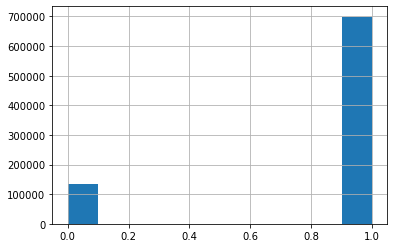

In [37]:
print(np.round(df_merge_clean['sentiment'].value_counts()*100/len(df_merge_clean),2))
df_merge_clean['sentiment'].hist()

In [53]:
df_merge_clean.price_level.isna().sum()

145269

In [55]:
df_merge_clean.head(1).T

,0
id_review,ChZDSUhNMG9nS0VJQ0FnSUN5LWZtWmZnEAE
caption,One of my new favorite places 😋
relative_date,a month ago
retrieval_date,2021-03-23
rating,5
username,Monica Crist
n_review_user,20
n_photo_user,0
url_user,https://www.google.com/maps/contrib/1173007091...
census_block_group,10810402004


In [159]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X = df_merge_clean[['caption', 'n_review_user','price_level']]
X['price_level'] = X['price_level'].fillna(X['price_level'].mode()[0])
scalar.fit_transform(X['n_review_user'].values.reshape(-1,1))

array([[0.02004008],
       [0.        ],
       [0.001002  ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [160]:

english_stops = set(stopwords.words('english'))

def prep_data(X,y):
    scalar = MinMaxScaler()


    # PRE-PROCESS REVIEW
    X['caption'] = X['caption'].replace({'<.*?>': ''}, regex = True)          # remove html tag
    X['caption'] = X['caption'].replace({'[^A-Za-z]': ' '}, regex = True) # remove non alphabet
    
    X['caption'] = X['caption'].apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    X['caption'] = X['caption'].apply(lambda review: [w.lower() for w in review]) # lower case
    X['caption'] = X['caption'].apply(lambda review: [lemmatizer.lemmatize(w) for w in review]) 
    
    # ENCODE SENTIMENT -> 0 & 1
    y = y.replace('positive', 1)
    y = y.replace('negative', 0)

    X['price_level'] = X['price_level'].fillna(X['price_level'].mode()[0])
    for col in X.columns:
        if col != 'caption':
            X[col] = scalar.fit_transform(X[col].values.reshape(-1,1))
    return X,y

In [161]:
X = df_merge_clean[['caption', 'n_review_user','price_level']]
y = df_merge_clean[['sentiment']]
X_prep, y_prep = prep_data(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_prep, y_prep, test_size = 0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1) 


In [162]:

def get_max_length(X_train):
    review_length = []
    for review in X_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [166]:
def tokenize_text(x_train,x_test):
    token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
    token.fit_on_texts(x_train)
    x_train = token.texts_to_sequences(x_train)

    x_test = token.texts_to_sequences(x_test)

    max_length = get_max_length(x_train)

    x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
    x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')
    return token,max_length,x_train,x_test

In [164]:
x_train1,x_test1 = X_train['caption'],X_test['caption']
token,max_length,x_train1,x_test1 = tokenize_text(x_train1,x_test1)
total_words = len(token.word_index) + 1 

In [165]:
x = token.word_index
{k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

{'quesidias': 88803,
 'meteocre': 88802,
 'sumner': 88801,
 'esmeralde': 88800,
 'exalt': 88799,
 'eatmorechicken': 88798,
 'houlihans': 88797,
 'sketty': 88796,
 'jundillo': 88795,
 'puro': 88794,
 'sabia': 88793,
 'twk': 88792,
 'bottleless': 88791,
 'beera': 88790,
 'vu': 88789,
 'unlce': 88788,
 'subatomic': 88787,
 'smallthanks': 88786,
 'doordarshan': 88785,
 'cached': 88784,
 'ashlee': 88783,
 'flavoeful': 88782,
 'silron': 88781,
 'fivefivefive': 88780,
 'shampooing': 88779,
 'disapppointing': 88778,
 'reassessed': 88777,
 'xone': 88776,
 'apreciated': 88775,
 'niakani': 88774,
 'discriminized': 88773,
 'pizzapie': 88772,
 'yalllllll': 88771,
 'oglevy': 88770,
 'sparty': 88769,
 'wolverine': 88768,
 'yesturday': 88767,
 'flavorblasting': 88766,
 'defint': 88765,
 'phonetically': 88764,
 'antooo': 88763,
 'influencd': 88762,
 'jeeeeeezusss': 88761,
 'chiiiiiiiiiiiiiiiiiiiiillllle': 88760,
 'dex': 88759,
 'torikaraage': 88758,
 'deflects': 88757,
 'zhajuang': 88756,
 'yiz': 88755

In [167]:
x_train2,x_test2 = X_train[['n_review_user','price_level']].values,X_test[['n_review_user','price_level']].values

In [94]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten, LSTM
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate

<AxesSubplot:>

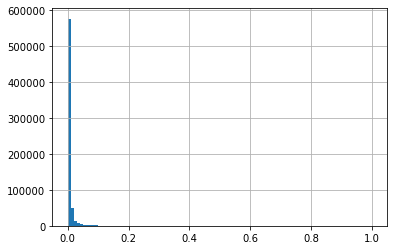

In [168]:
X_train['n_review_user'].hist(bins=100)

In [181]:
EMBED_DIM = 64
LSTM_OUT = 64
input_1 = Input(shape=(max_length,))

input_2 = Input(shape=(2,))

embedding_layer = Embedding(total_words, EMBED_DIM)(input_1)
LSTM_Layer_1 = Bidirectional(LSTM(64,return_sequences=False))(embedding_layer)
dense_layer_1 = Dense(128, activation='relu')(input_2)
# dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
concat_layer = Concatenate()([LSTM_Layer_1, dense_layer_1])
dense_layer_3 = Dense(64, activation='relu')(concat_layer)
output = Dense(1, activation='sigmoid')(dense_layer_3)
model = Model(inputs=[input_1, input_2], outputs=output)



In [182]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())


Model: "functional_43"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 11)]         0                                            
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 11, 64)       5683456     input_43[0][0]                   
__________________________________________________________________________________________________
input_44 (InputLayer)           [(None, 2)]          0                                            
__________________________________________________________________________________________________
bidirectional_5 (Bidirectional) (None, 128)          66048       embedding_21[0][0]               
______________________________________________________________________________________

In [98]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [183]:
history = model.fit(x=[x_train1, x_train2], y=y_train, batch_size=128, epochs=4, verbose=1, validation_split=0.1)

Epoch 1/4
4682/4682 [==============================] - 187s 40ms/step - loss: 0.1545 - acc: 0.9398 - val_loss: 0.1412 - val_acc: 0.9465
Epoch 2/4
4682/4682 [==============================] - 184s 39ms/step - loss: 0.1243 - acc: 0.9521 - val_loss: 0.1376 - val_acc: 0.9470
Epoch 3/4
4682/4682 [==============================] - 185s 39ms/step - loss: 0.1092 - acc: 0.9586 - val_loss: 0.1410 - val_acc: 0.9473
Epoch 4/4
4682/4682 [==============================] - 186s 40ms/step - loss: 0.0960 - acc: 0.9638 - val_loss: 0.1434 - val_acc: 0.9456


In [148]:
score = model.evaluate(x=[x_test1, x_test2], y=y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

5203/5203 [==============================] - 11s 2ms/step - loss: 0.1433 - acc: 0.9487
Test Score: 0.1433217078447342
Test Accuracy: 0.9487060904502869


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU, Bidirectional # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model

In [262]:

# ARCHITECTURE
EMBED_DIM = 64
LSTM_OUT = 64

model_RNN_LSTM = Sequential()
model_RNN_LSTM.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model_RNN_LSTM.add((LSTM(LSTM_OUT,return_sequences=False)))
model_RNN_LSTM.add(Dense(1, activation='sigmoid'))
model_RNN_LSTM.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model_RNN_LSTM.summary())
model_RNN_LSTM.fit(x_train, y_train, validation_data= (x_val,y_val),batch_size = 128, epochs = 3)


Epoch 1/3
4682/4682 [==============================] - 192s 41ms/step - loss: 0.1354 - accuracy: 0.9489 - val_loss: 0.1177 - val_accuracy: 0.9560
Epoch 2/3
4682/4682 [==============================] - 193s 41ms/step - loss: 0.1053 - accuracy: 0.9606 - val_loss: 0.1138 - val_accuracy: 0.9573
Epoch 3/3
4682/4682 [==============================] - 192s 41ms/step - loss: 0.0908 - accuracy: 0.9662 - val_loss: 0.1157 - val_accuracy: 0.9567


In [296]:

# ARCHITECTURE
EMBED_DIM = 64
LSTM_OUT = 64

model_RNN_LSTM_Bi = Sequential()
model_RNN_LSTM_Bi.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model_RNN_LSTM_Bi.add(Bidirectional(LSTM(LSTM_OUT,return_sequences=False)))
model_RNN_LSTM_Bi.add(Dense(1, activation='sigmoid'))
model_RNN_LSTM_Bi.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model_RNN_LSTM_Bi.summary())
model_RNN_LSTM_Bi.fit(x_train, y_train, validation_data= (x_val,y_val),batch_size = 128, epochs = 3)



Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 18, 64)            5380224   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 128)               66048     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 5,446,401
Trainable params: 5,446,401
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
4682/4682 [==============================] - 177s 38ms/step - loss: 0.1336 - accuracy: 0.9493 - val_loss: 0.1183 - val_accuracy: 0.9550
Epoch 2/3
4682/4682 [==============================] - 176s 38ms/step - loss: 0.1041 - accuracy: 0.9610 - val_loss: 0.1140 - val_accuracy: 0.9573
Epoch 3/3
4682/4682 [==============================] - 176s 38ms/step - loss

In [277]:

# ARCHITECTURE
EMBED_DIM = 64
LSTM_OUT = 64

model_RNN_GRU = Sequential()
model_RNN_GRU.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model_RNN_GRU.add((GRU(LSTM_OUT,return_sequences=False)))
model_RNN_GRU.add(Dense(1, activation='sigmoid'))
model_RNN_GRU.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model_RNN_GRU.summary())
model_RNN_GRU.fit(x_train, y_train, validation_data= (x_val,y_val),batch_size = 128, epochs = 3)


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 18, 64)            5777856   
_________________________________________________________________
gru (GRU)                    (None, 64)                24960     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 5,802,881
Trainable params: 5,802,881
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
4682/4682 [==============================] - 189s 40ms/step - loss: 0.1346 - accuracy: 0.9489 - val_loss: 0.1172 - val_accuracy: 0.9553
Epoch 2/3
4682/4682 [==============================] - 187s 40ms/step - loss: 0.1047 - accuracy: 0.9603 - val_loss: 0.1155 - val_accuracy: 0.9568
Epoch 3/3
4682/4682 [==============================] - 189s 40ms/step - loss

In [234]:
def plot_heatmap_mat(y_test,pred,classes,normalize=False ):
    sns.set_context("poster", rc={"font.size":24})   
    conf_mx = confusion_matrix(y_test,pred)
    if normalize:
        row_sums = conf_mx.sum(axis=1, keepdims=True)
        norm_conf_mx = conf_mx / row_sums
        plot = sns.heatmap(norm_conf_mx, annot=True, square=True,
                    xticklabels=classes,yticklabels=classes, fmt='.2f',
                    linewidths=.5)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        return plot
    else:
        plot = sns.heatmap(conf_mx, annot=True, square=True,
                    xticklabels=classes,yticklabels=classes,fmt='d',
                    linewidths=.5)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        return plot

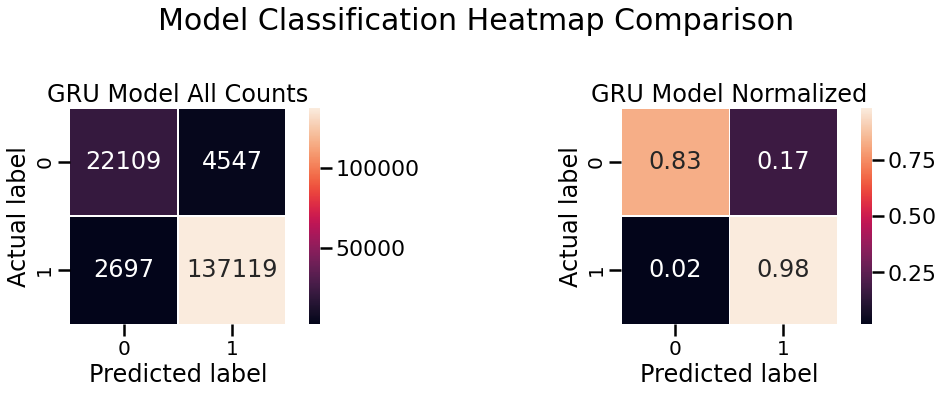

Accuracy: 95.6485174684031


In [278]:
y_pred = model_RNN_GRU.predict_classes(x_test, batch_size = 128)

import seaborn as sns
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, confusion_matrix

import seaborn as sns

fig = plt.figure(figsize=(15,10))

fig.suptitle('Model Classification Heatmap Comparison\n\n',fontsize=30, x= 0.55, y = 0.9)

ax1 = plt.subplot(221); plot_heatmap_mat(y_test,y_pred,normalize=False,classes = [0,1])
ax1.title.set_text('GRU Model All Counts')

ax2 = plt.subplot(222); plot_heatmap_mat(y_test,y_pred,normalize=True,classes = [0,1])
ax2.title.set_text('GRU Model Normalized')


plt.tight_layout()
plt.show()

print('Accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))


<AxesSubplot:>

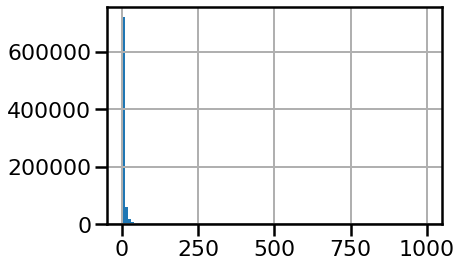

In [314]:
(df_merge_clean.n_review_user).hist(bins=100)

In [ ]:
df_merge_clean.types

In [ ]:
df_merge_clean.dtypes

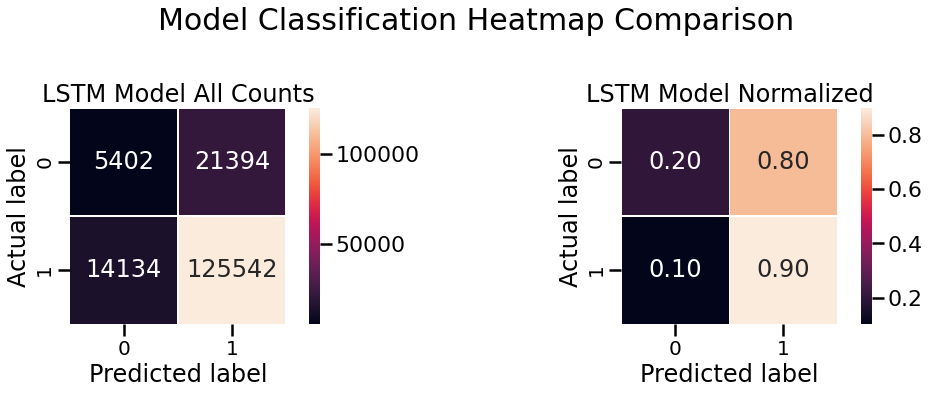

Accuracy: 78.65827286270364


In [299]:
y_pred = model_RNN_LSTM.predict_classes(x_test, batch_size = 128)

import seaborn as sns
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, confusion_matrix

import seaborn as sns

fig = plt.figure(figsize=(15,10))

fig.suptitle('Model Classification Heatmap Comparison\n\n',fontsize=30, x= 0.55, y = 0.9)

ax1 = plt.subplot(221); plot_heatmap_mat(y_test,y_pred,normalize=False,classes = [0,1])
ax1.title.set_text('LSTM Model All Counts')

ax2 = plt.subplot(222); plot_heatmap_mat(y_test,y_pred,normalize=True,classes = [0,1])
ax2.title.set_text('LSTM Model Normalized')


plt.tight_layout()
plt.show()

print('Accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))


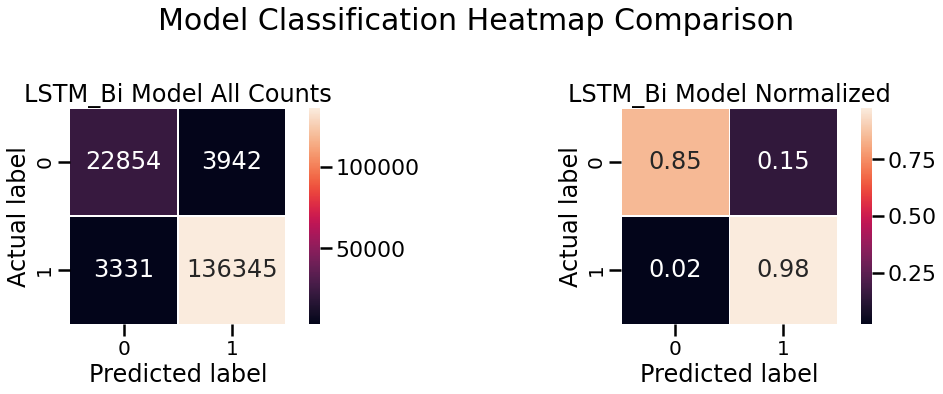

Accuracy: 95.63109712143783


In [297]:
y_pred = model_RNN_LSTM_Bi.predict_classes(x_test, batch_size = 128)

import seaborn as sns
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, confusion_matrix

import seaborn as sns

fig = plt.figure(figsize=(15,10))

fig.suptitle('Model Classification Heatmap Comparison\n\n',fontsize=30, x= 0.55, y = 0.9)

ax1 = plt.subplot(221); plot_heatmap_mat(y_test,y_pred,normalize=False,classes = [0,1])
ax1.title.set_text('LSTM_Bi Model All Counts')

ax2 = plt.subplot(222); plot_heatmap_mat(y_test,y_pred,normalize=True,classes = [0,1])
ax2.title.set_text('LSTM_Bi Model Normalized')


plt.tight_layout()
plt.show()

print('Accuracy: {}'.format(accuracy_score(y_test,y_pred)*100))


In [23]:
import string

def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [24]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [25]:
import re

In [27]:
train_text = df_merge_clean['caption'].values
vectorize_layer.adapt(train_text)

In [28]:

def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [31]:
raw_train_ds = df_merge_clean[['caption', 'sentiment']].values

In [44]:
import tensorflow_datasets as tfds
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

GPU is available


Dataset imdb_reviews downloaded and prepared to C:\Users\swami\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [49]:
train_data.take(1)

<TakeDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [32]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

TypeError: 'int' object is not subscriptable

In [38]:
 seed =42
tf.keras.preprocessing.text(
    raw_train_ds, 
    batch_size=32, 
    validation_split=0.2, 
    subset='training')

TypeError: 'module' object is not callable

In [50]:
url = 'https://github.com/hansmichaels/sentiment-analysis-IMDB-Review-using-LSTM/blob/master/sentiment_analysis.py.ipynb'
url

'https://github.com/hansmichaels/sentiment-analysis-IMDB-Review-using-LSTM/blob/master/sentiment_analysis.py.ipynb'